In [29]:
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from dataset import TreeStimuli, Neuron, Ensemble, LinearNeuron, InteractionNeuron,LogisticNeuron, UnivariateGaussianNeuron, MultivariateGaussianNeuron
from copy import deepcopy
from functools import partial
import random
import math

## Stimuli space

In [2]:
# Synthetic dataset - stimuli space
Trees = TreeStimuli()
Trees.stimuli.shape

(40, 2)

## Neuron ensembles

In [3]:
def GeneratePureSelectiveWeights():
    weights = [[random.uniform(0,1)],[0]]
    random.shuffle(weights)
    return(np.array(weights))

def GenerateMixedSelectiveWeights():
    weights = [[random.uniform(0,1)],[random.uniform(0,1)]]
    return(np.array(weights))

def GenerateMus():
    return([random.uniform(0,1),random.uniform(0,1)])
    return(np.array(weights))

In [4]:
# define parameter limits

sig_range = [0.05,0.9]
mu_range = [0.0,1]
cov_range = [0.1,0.9]

noise_mu = 0.01
noise_sig = 0.01

In [5]:
# Number of neurons
N = 100

## Ensemble 1:  Pure Selective Linear 
classes = [LinearNeuron]*N
params = [{'w': GeneratePureSelectiveWeights(), "noise_mu":noise_mu, "noise_sig":noise_sig} for _ in range(N)]
PureSelectiveLinearEnsemble = Ensemble(classes,params)

## Ensemble 2:  Pure Selective Non Linear (Univariate Gaussian)
classes = [UnivariateGaussianNeuron]*N
params = [{"w": GeneratePureSelectiveWeights(), 
           'mu':random.uniform(mu_range[0], mu_range[1]), 
           'sig':random.uniform(sig_range[0],sig_range[1]),
           "noise_mu":noise_mu, "noise_sig":noise_sig} for _ in range(N)]
PureSelectiveGaussianEnsemble = Ensemble(classes,params)

## Ensemble 3:  Linear Mixed selective
classes = [LinearNeuron]*N
params = [{"w": GenerateMixedSelectiveWeights(), "noise_mu":noise_mu, "noise_sig":noise_sig} for _ in range(N)]
MixSelectiveLinearEnsemble = Ensemble(classes,params)

## Ensemble 4:  Non Linear Mixed selective
classes = [MultivariateGaussianNeuron]*N
params = [{"mus":[random.uniform(mu_range[0], mu_range[1]),random.uniform(mu_range[0], mu_range[1])],
           "cov":random.uniform(cov_range[0],cov_range[1]),
           "noise_mu":noise_mu, "noise_sig":noise_sig} for _ in range(N)]
MixSelectiveGaussianEnsemble = Ensemble(classes,params)


NeuronSpaces = {
    "Stimuli Space":Trees.stimuli,
    "Pure Selective - Linear": PureSelectiveLinearEnsemble.fire(Trees.stimuli),
    "Pure Selective - Non linear": PureSelectiveGaussianEnsemble.fire(Trees.stimuli),
    "Mixed Selective - Linear":MixSelectiveLinearEnsemble.fire(Trees.stimuli),
    "Mixed Selective - Non Linear": MixSelectiveGaussianEnsemble.fire(Trees.stimuli)
}


# Manifold Learning

/Users/miahannah/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Stimuli Space (40, 2)
Pure Selective - Linear (40, 100)
Pure Selective - Non linear (40, 100)
Mixed Selective - Linear (40, 100)
Mixed Selective - Non Linear (40, 100)


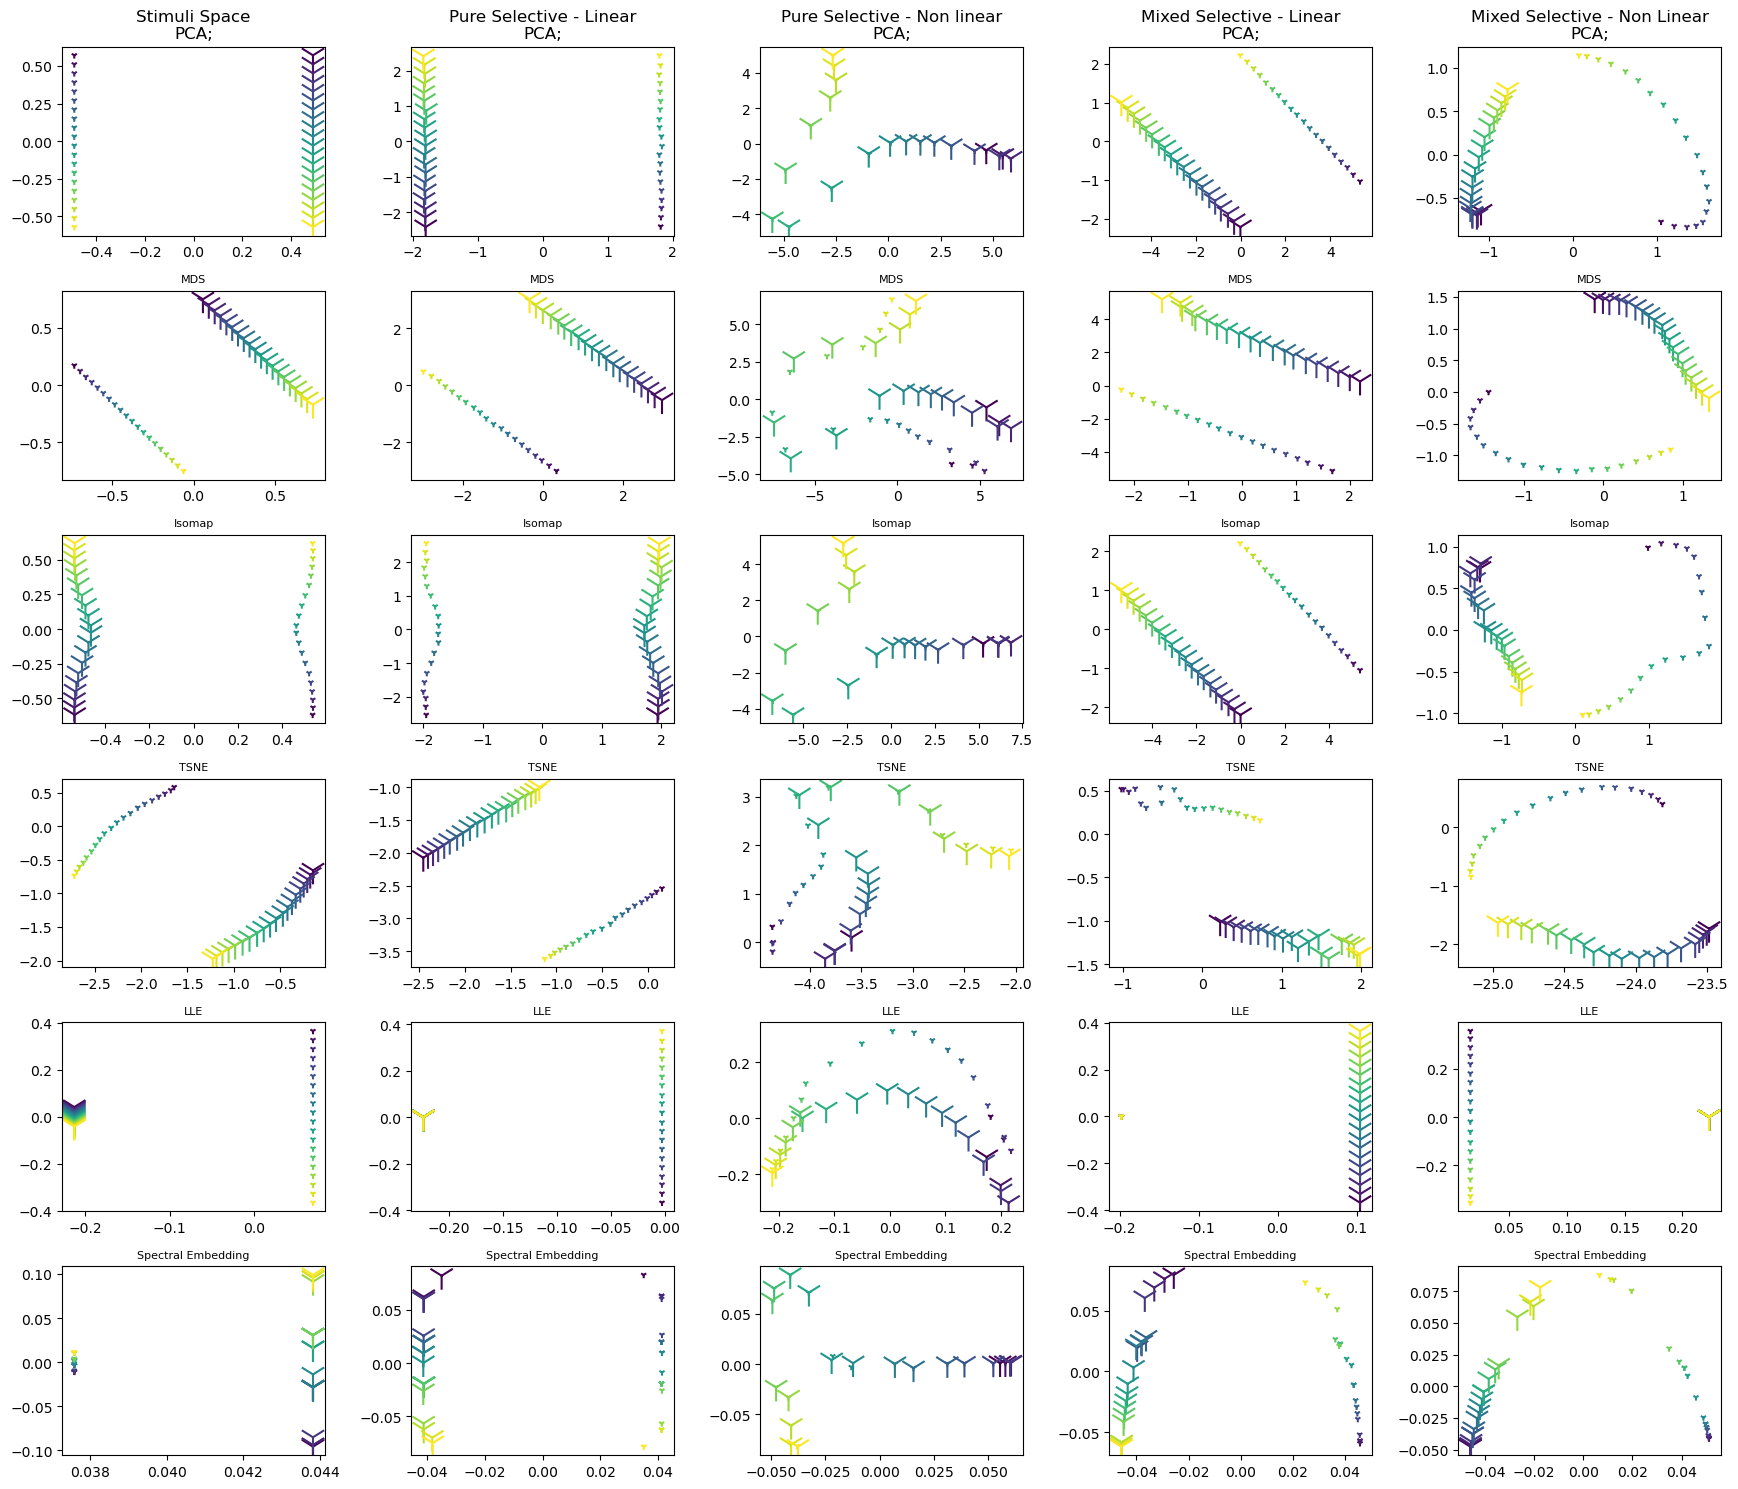

In [6]:
# visualize neural representation - firing response

# compute Dim reduction
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding

# calculate...
pca_space, mds_space, isomap_space, tsne_space, LLE_space, spec_space = {}, {}, {}, {}, {}, {}
for js,(s_name,s_mat) in enumerate(NeuronSpaces.items()):
    pca_space[s_name] = PCA(n_components=2).fit_transform(s_mat)
    mds_space[s_name] = MDS(n_components=2).fit_transform(s_mat)
    isomap_space[s_name] = Isomap(n_components=2, n_neighbors=30).fit_transform(s_mat)
    tsne_space[s_name] = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(s_mat)
    LLE_space[s_name] = LocallyLinearEmbedding(n_components=2).fit_transform(s_mat)
    spec_space[s_name] = SpectralEmbedding(n_components=2, n_neighbors=16).fit_transform(s_mat)

# Plot firing rates and PCA transformed firing rates
cols = len(NeuronSpaces)
rows = 6
fig = plt.figure(figsize=(3.5*cols,15))
for jss,(s_name,s_mat) in enumerate(NeuronSpaces.items()):
    print(s_name, s_mat.shape)
    js=jss+1
    ax1 = fig.add_subplot(6, cols, js)
    ax1.scatter(x=pca_space[s_name][:,0],y=pca_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax1.set_title(f'{s_name}\nPCA;')

    ax2 = fig.add_subplot(6, cols, cols + js)
    ax2.scatter(x=mds_space[s_name][:,0],y=mds_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax2.set_title(f'MDS', fontsize=8)

    ax3 = fig.add_subplot(6, cols, 2*cols + js)
    ax3.scatter(x=isomap_space[s_name][:,0],y=isomap_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax3.set_title(f'Isomap', fontsize=8)

    ax3 = fig.add_subplot(6, cols, 3*cols + js)
    ax3.scatter(x=tsne_space[s_name][:,0],y=tsne_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax3.set_title(f'TSNE', fontsize=8)

    ax4 = fig.add_subplot(6, cols, 4*cols + js)
    ax4.scatter(x=LLE_space[s_name][:,0],y=LLE_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax4.set_title(f'LLE', fontsize=8)

    ax5 = fig.add_subplot(6, cols, 5*cols + js)
    ax5.scatter(x=spec_space[s_name][:,0],y=spec_space[s_name][:,1], c=Trees.stimuli[:,0],s=np.exp(Trees.stimuli[:,1]*3+3),marker="1")
    ax5.set_title(f'Spectral Embedding', fontsize=8)

fig.tight_layout()

# Dimensionality Estimation

In [7]:
import skdim

In [8]:
for js,(s_name,s_mat) in enumerate(NeuronSpaces.items()):
    
    model = PCA(n_components=2)
    model.fit_transform(s_mat)
    dimPC1 =model.explained_variance_ratio_[0]
    dimPCA_default = skdim.id.lPCA().fit(s_mat).dimension_
    dimPCA_PR = round(skdim.id.lPCA(ver='participation_ratio').fit(s_mat).dimension_,2)
    dimFisherS = round(skdim.id.FisherS().fit(s_mat).dimension_,2)
    dimCorrInt = round(skdim.id.CorrInt().fit(s_mat).dimension_,2)
    dimKNN = round(skdim.id.KNN().fit(s_mat).dimension_,2)
    dimMLE= round(skdim.id.MLE().fit(s_mat).dimension_,2)
    dimMiNDML = round(skdim.id.MiND_ML().fit(s_mat).dimension_,2)
    
    
    print(f'{s_name}:\nLINEAR:: PC1 variance = {round(dimPC1,2)}, Participation ratio: {dimPCA_PR}\nNONLINEAR:: Fisher S: {dimFisherS}; CorrInt: {dimCorrInt},KNN: {dimKNN}; MLE: {dimMLE}; MiND_ML: {dimMiNDML}\n')

Stimuli Space:
LINEAR:: PC1 variance = 0.67, Participation ratio: 1.8
NONLINEAR:: Fisher S: 1.93; CorrInt: 0.72,KNN: 2; MLE: 0.89; MiND_ML: 1.19

Pure Selective - Linear:
LINEAR:: PC1 variance = 0.65, Participation ratio: 1.83
NONLINEAR:: Fisher S: 1.93; CorrInt: 0.75,KNN: 1; MLE: 0.91; MiND_ML: 1.2

Pure Selective - Non linear:
LINEAR:: PC1 variance = 0.38, Participation ratio: 3.38
NONLINEAR:: Fisher S: 2.41; CorrInt: 5.21,KNN: 100; MLE: 2.08; MiND_ML: 2.0

Mixed Selective - Linear:
LINEAR:: PC1 variance = 0.9, Participation ratio: 1.21
NONLINEAR:: Fisher S: 1.92; CorrInt: 1.11,KNN: 2; MLE: 1.16; MiND_ML: 1.33

Mixed Selective - Non Linear:
LINEAR:: PC1 variance = 0.66, Participation ratio: 2.06
NONLINEAR:: Fisher S: 2.53; CorrInt: 1.27,KNN: 8; MLE: 1.16; MiND_ML: 2.0



In [26]:
DimensionalityMetrics = ['PC1', 'PCA_default', 'Participation Ratio', 'FisherS', 'CorrInt', 'KNN', 'MLE', 'MiNDML']
dim_dict = {}

for js,(s_name,s_mat) in enumerate(NeuronSpaces.items()):
    # PCA
    model = PCA(n_components=2)
    model.fit_transform(s_mat)
    dimPC1 =model.explained_variance_ratio_[0]
    # intrinsic dimensionality methods
    dimPCA_default = skdim.id.lPCA().fit(s_mat).dimension_
    dimPCA_PR = round(skdim.id.lPCA(ver='participation_ratio').fit(s_mat).dimension_,2)
    dimFisherS = round(skdim.id.FisherS().fit(s_mat).dimension_,2)
    dimCorrInt = round(skdim.id.CorrInt().fit(s_mat).dimension_,2)
    dimKNN = round(skdim.id.KNN(k=2).fit(s_mat).dimension_,2)
    dimMLE= round(skdim.id.MLE().fit(s_mat).dimension_,2)
    dimMiNDML = round(skdim.id.MiND_ML().fit(s_mat).dimension_,2)
    
    dim_dict[s_name] = [dimPC1, dimPCA_default, dimPCA_PR, dimFisherS, dimCorrInt, dimKNN, dimMLE, dimMiNDML]

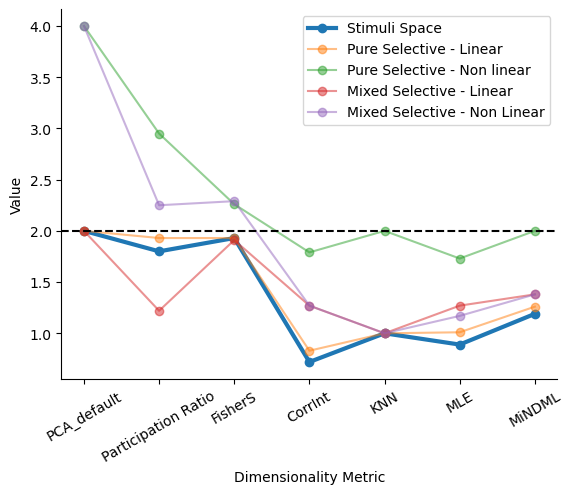

In [28]:
for s_name in dim_dict:
    if s_name == 'Stimuli Space':
        plt.plot(dim_dict[s_name][1:], linewidth = 3, marker = 'o', label = s_name)
    else:
        plt.plot(dim_dict[s_name][1:], alpha=0.5, marker = 'o', label = s_name)
plt.xticks(ticks=np.arange(len(dim_dict[s_name][1:])), labels=DimensionalityMetrics[1:], rotation=30)
plt.xlabel('Dimensionality Metric')
plt.ylabel('Value')
plt.axhline(y=2, c='black', linestyle='--')

plt.legend()
sns.despine()

# Shattering Dimensionality

In [55]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Shattering dimensionality

# N neurons, c conditions (stimuli)
# Total possible binary classifications = 2^c

In [9]:
s_mat.shape

(40, 100)

In [19]:
from itertools import combinations, combinations_with_replacement

In [47]:
N = s_mat.shape[1] # neurons
cmax = s_mat.shape[0] # conditions
Tc = 2**cmax # max number of classifications
S = s_mat.shape[0] # number of trials




In [35]:
c = 3
possible_labels = list(combinations_with_replacement(np.arange(c), N))
len(possible_labels)

5151

In [45]:
def generate_all_labels(c, S):
    vector_indices = list(range(S))
    condition_idx_combinations = list(combinations(vector_indices, c))
    
    all_combinations = []
    for cond_idx in condition_idx_combinations:
        vector = [1 if i in cond_idx else 0 for i in vector_indices]
        all_combinations.append(vector)

    return all_combinations

In [48]:
c = 3
generated_labs = generate_all_labels(c, S)
len(generated_labs)

9880

In [49]:
example1 = generated_labs[1]

In [54]:
clf = LogisticRegressionCV(cv=2, random_state=0).fit(s_mat, example1)
clf.score(s_mat, example1)

0.925

0.925